In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns
from matplotlib.gridspec import GridSpec
import scanpy as sc
import muon as mu
import graphtools
import magic
from matplotlib.pyplot import rc_context
from matplotlib import gridspec
import os


from datashader.mpl_ext import dsshow
import datashader as ds

import matplotlib.colors
cmap = plt.cm.hsv
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../Code/')
from utils import read_dataset_log


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,metadata_fn,...,cnmf_dir,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,...,/data/srlab1/TCAT/Data/PerDataset/AMPRA,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,...,/data/srlab1/TCAT/Data/PerDataset/Pancancer,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,...,/data/srlab1/TCAT/Data/PerDataset/TBRU,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Manua...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Manua...,/data/srla

# Prepare markers

In [ ]:
# raw_counts_fn = '/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBAT-CITESeq-DATA.Raw.T.ADTfixed.h5ad'

In [4]:
outdir = '../../../Data/PerDataset/AMPRA'

In [5]:
figdir = '../../../Figures/Components'

In [6]:
outfn = os.path.join(outdir, 'ADT_TP10KCLR_ForMAGIC.h5ad')
print(outfn)

../../../Data/PerDataset/AMPRA/ADT_TP10KCLR_ForMAGIC.h5ad


In [7]:
adata_ADT = sc.read(outfn)

In [ ]:
set(rna_markers) - set(adata_RNA.var.index)

In [9]:
adt_markers = [#'AB_CD25',
               'AB_CD38-1', 'AB_CD279',#'AB_CD54', 
            'AB_CD69',# 'AB_CD71',
            'AB_CD274',
             # 'AB_CD95'
]
    
#     'AB_CD3-1', 'AB_CD4-2',
#                'AB_CD8', 'AB_CD45RA', 'AB_CD45RO',  'AB_CD18', 'AB_CD161',  'AB_CD194', 'AB_CD195', 'AB_CD196', 'AB_CXCR3',
#                'AB_CD25', 'AB_CD127', 
#                'AB_CD27-1',
#                'AB_TCR-Vd2', 'AB_TCR-V-7.2', 'AB_TCR-V-9', 'AB_abTCR', 'AB_gdTCR',
#                'AB_CD31', 'AB_CD62L', 'AB_CCR7',
#                'AB_CD314',
#                'AB_CD38-1', 'AB_CD39',
#               'AB_CD94', 'AB_CD49b', 'AB_CD28'
              # ] 
    

In [8]:
sorted(adata_ADT.var.index)

['AB_CD107a',
 'AB_CD112',
 'AB_CD119',
 'AB_CD11b-2',
 'AB_CD11c',
 'AB_CD127',
 'AB_CD14-2',
 'AB_CD140a',
 'AB_CD141',
 'AB_CD144',
 'AB_CD146',
 'AB_CD155',
 'AB_CD16',
 'AB_CD161',
 'AB_CD163',
 'AB_CD19',
 'AB_CD192',
 'AB_CD195',
 'AB_CD196',
 'AB_CD1c',
 'AB_CD20',
 'AB_CD206',
 'AB_CD209',
 'AB_CD21',
 'AB_CD226-1',
 'AB_CD24',
 'AB_CD27-2',
 'AB_CD273',
 'AB_CD274',
 'AB_CD278',
 'AB_CD279',
 'AB_CD3-1',
 'AB_CD304',
 'AB_CD309',
 'AB_CD31',
 'AB_CD314',
 'AB_CD34',
 'AB_CD38-1',
 'AB_CD4-1',
 'AB_CD44-1',
 'AB_CD45-1',
 'AB_CD45RA',
 'AB_CD45RO',
 'AB_CD55',
 'AB_CD56-2',
 'AB_CD64',
 'AB_CD68',
 'AB_CD69',
 'AB_CD86',
 'AB_CD8a',
 'AB_CD90',
 'AB_CX3CR1',
 'AB_EGFR',
 'AB_Folate',
 'AB_HLA-DR',
 'AB_IgGFc',
 'AB_IgM',
 'AB_Podoplanin']

In [10]:
set(adt_markers) - set(adata_ADT.var.index)

set()

In [11]:
adt_markers = list(set(adt_markers).intersection(adata_ADT.var.index))

In [12]:
G = graphtools.Graph(data=adata_ADT.obsp['connectivities'], precomputed='affinity')
magic_operator = magic.MAGIC(t=3)
magic_operator.fit(adata_ADT.X, graph=G)
markers_magic_adt = magic_operator.transform(X=adata_ADT[:, adt_markers].X)
markers_magic_adt = pd.DataFrame(markers_magic_adt, index=adata_ADT.obs.index, columns=adt_markers)

Running MAGIC on 94048 cells and 58 genes.
Using precomputed graph and diffusion operator...
Calculating imputation...
Calculated imputation in 0.03 seconds.


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/PHShome/mc1070/.local/lib/python3.7/site-packages/magic/magic.py:546: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  UserWarning,


In [13]:
markers_magic_adt

,AB_CD274,AB_CD279,AB_CD38-1,AB_CD69
BRI-399_AAACGAATCTGCATGA,0.659035,3.573211,1.888642,2.614182
BRI-399_AAACGCTTCCTTGACC,0.454094,2.097970,1.799484,1.912849
BRI-399_AAAGGGCAGCCGGAAT,0.321161,3.894878,2.510082,2.138981
BRI-399_AAAGGGCCACTATGTG,0.362426,2.446416,2.043504,2.267231
BRI-399_AAAGGTAGTGCAGGAT,0.560611,3.768641,1.776490,2.586037
...,...,...,...,...
BRI-637R_TGGTACAGTTACCCAA,0.217587,3.766724,2.475749,4.187765
BRI-637R_TGTCAGACAACGGCTC,0.412365,2.789639,2.042996,1.855361
BRI-637R_TTCCAATAGGTACCTT,0.921908,2.941231,2.058312,2.832395
BRI-637R_TTCGGTCCAGCAGTAG,0.432988,2.959776,1.742110,2.297592


In [14]:
markers_magic = markers_magic_adt

In [15]:
outfn = os.path.join(outdir, 'MagicMarker.ActivationOnly.ADT_CLRTP10K.tsv')
print(outfn)

../../../Data/PerDataset/AMPRA/MagicMarker.ActivationOnly.ADT_CLRTP10K.tsv


In [16]:
markers_magic.to_csv(outfn, sep='\t')

In [17]:
unsmoothed_markers = pd.DataFrame(np.array(adata_ADT[:, adt_markers].X), 
                                  index=adata_ADT.obs.index,
                         columns=adt_markers)



In [18]:
outfn = os.path.join(outdir, 'UnsmoothedMarker.ActivationOnly.ADT_CLRTP10K.tsv')
print(outfn)

../../../Data/PerDataset/AMPRA/UnsmoothedMarker.ActivationOnly.ADT_CLRTP10K.tsv


In [19]:
unsmoothed_markers.to_csv(outfn, sep='\t')

# Gate on markers

In [20]:
markers_magic = pd.read_csv(os.path.join(outdir, 'MagicMarker.ActivationOnly.ADT_CLRTP10K.tsv'), 
                            index_col = 0, sep = '\t'
                           )

In [21]:
unsmoothed_markers = pd.read_csv(os.path.join(outdir, 'UnsmoothedMarker.ActivationOnly.ADT_CLRTP10K.tsv'), 
                            index_col = 0, sep = '\t'
                           )

## All cells

In [25]:
dataset = 'AMP-RA'

In [22]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [ ]:
markers_magic.columns

AB_CD274 AB_CD274
AB_CD274 AB_CD279
AB_CD274 AB_CD38-1
AB_CD274 AB_CD69
AB_CD279 AB_CD274
AB_CD279 AB_CD279
AB_CD279 AB_CD38-1
AB_CD279 AB_CD69
AB_CD38-1 AB_CD274
AB_CD38-1 AB_CD279
AB_CD38-1 AB_CD38-1
AB_CD38-1 AB_CD69
AB_CD69 AB_CD274
AB_CD69 AB_CD279
AB_CD69 AB_CD38-1
AB_CD69 AB_CD69


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/datashader/mpl_ext.py:144: UserWarning: EqHistColorMapper warning: Histogram equalization did not converge.
  "EqHistColorMapper warning: Histogram equalization did not converge."


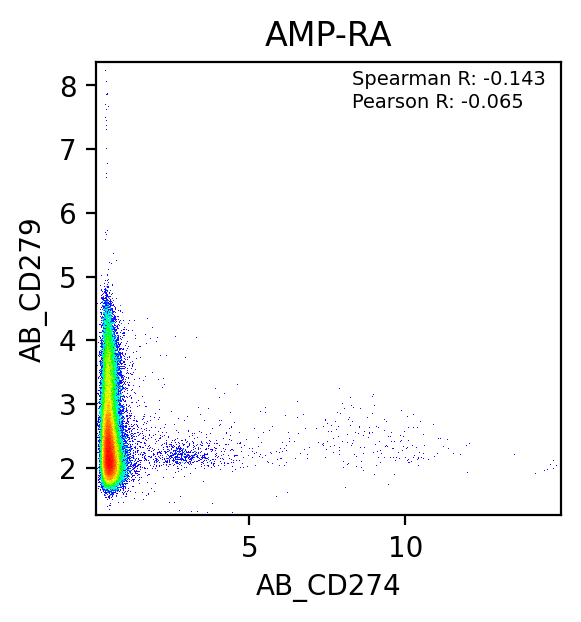

/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/datashader/mpl_ext.py:144: UserWarning: EqHistColorMapper warning: Histogram equalization did not converge.
  "EqHistColorMapper warning: Histogram equalization did not converge."
/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/datashader/mpl_ext.py:144: UserWarning: EqHistColorMapper warning: Histogram equalization did not converge.
  "EqHistColorMapper warning: Histogram equalization did not converge."


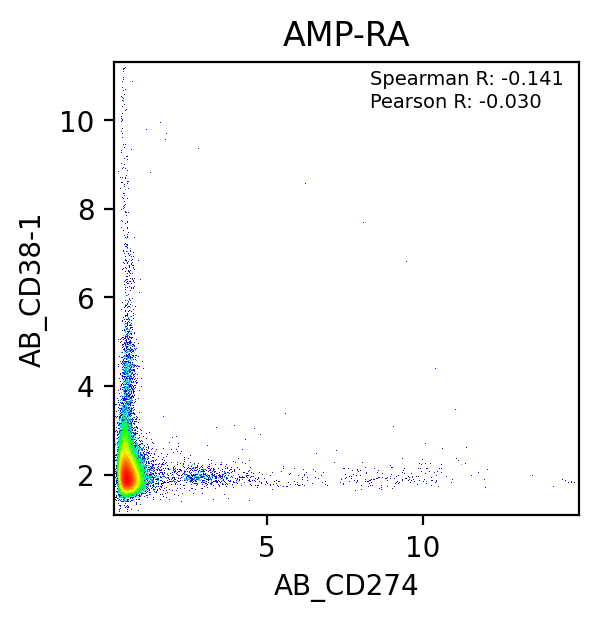

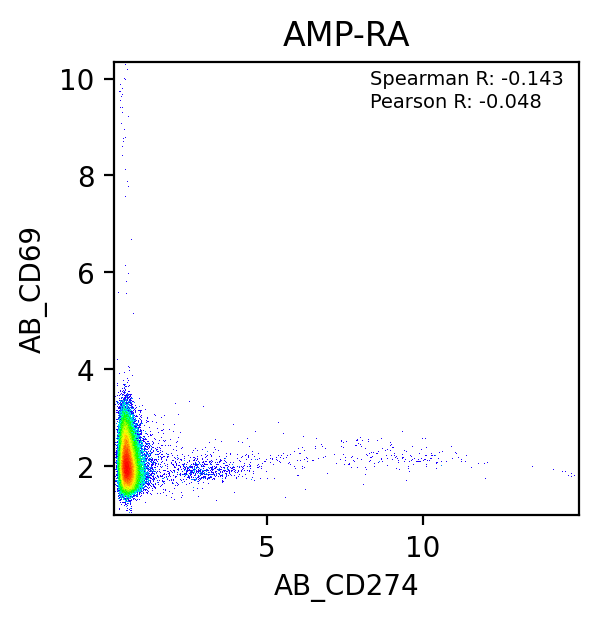

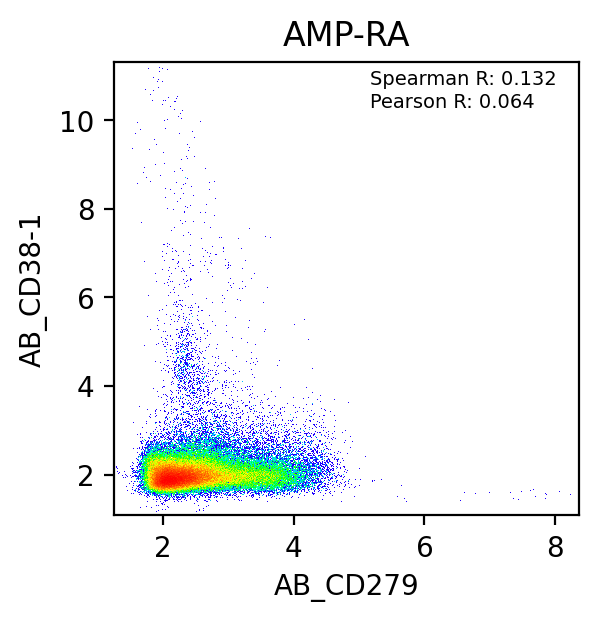

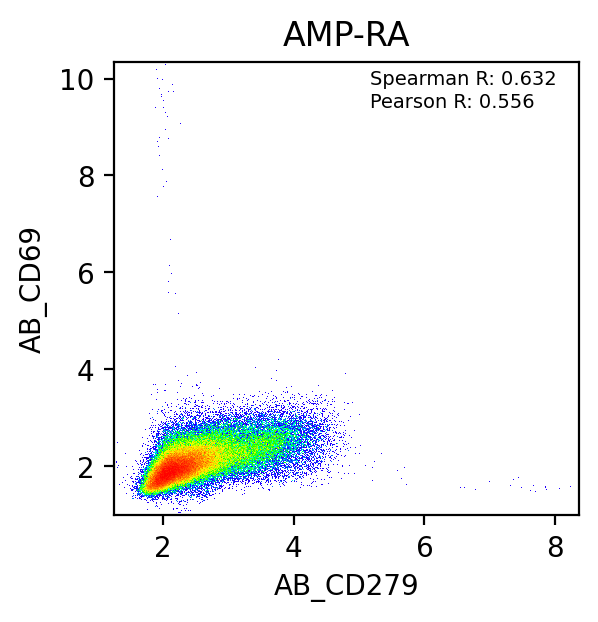

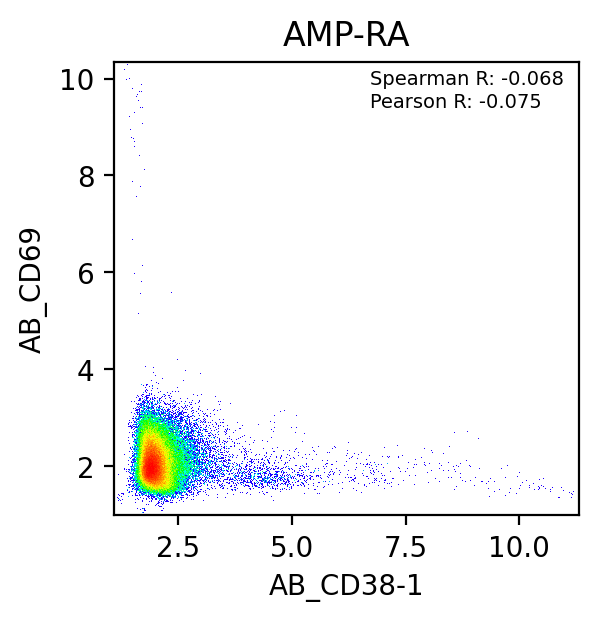

In [26]:
for i, p1 in enumerate(markers_magic.columns):
    
    for j, p2 in enumerate(markers_magic.columns):
        print(p1, p2)
        if j > i:
            x = markers_magic[p1]
            y = markers_magic[p2]
            
            r_p, _ = pearsonr(x, y)
            r_s, _ = spearmanr(x, y)

            fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
            # ax.scatter(x, y)
            dsshow(pd.DataFrame({'x':x, 'y':y}), 
                   ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
            # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
            ax.text(x = .55, y = .95, s = 'Spearman R: %.3f' % r_s, fontsize = 7, transform=ax.transAxes)
            ax.text(x = .55, y = .9, s = 'Pearson R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
            ax.set_xlabel(p1)
            ax.set_ylabel(p2)
            ax.set_title(dataset)

0 AB_CD274
0 AB_CD274
1 AB_CD274
2 AB_CD274
3 AB_CD274
1 AB_CD279
1 AB_CD279
2 AB_CD279
3 AB_CD279
2 AB_CD38-1
2 AB_CD38-1
3 AB_CD38-1
3 AB_CD69
3 AB_CD69


Text(0.5, 0.9, 'AMP-RA')

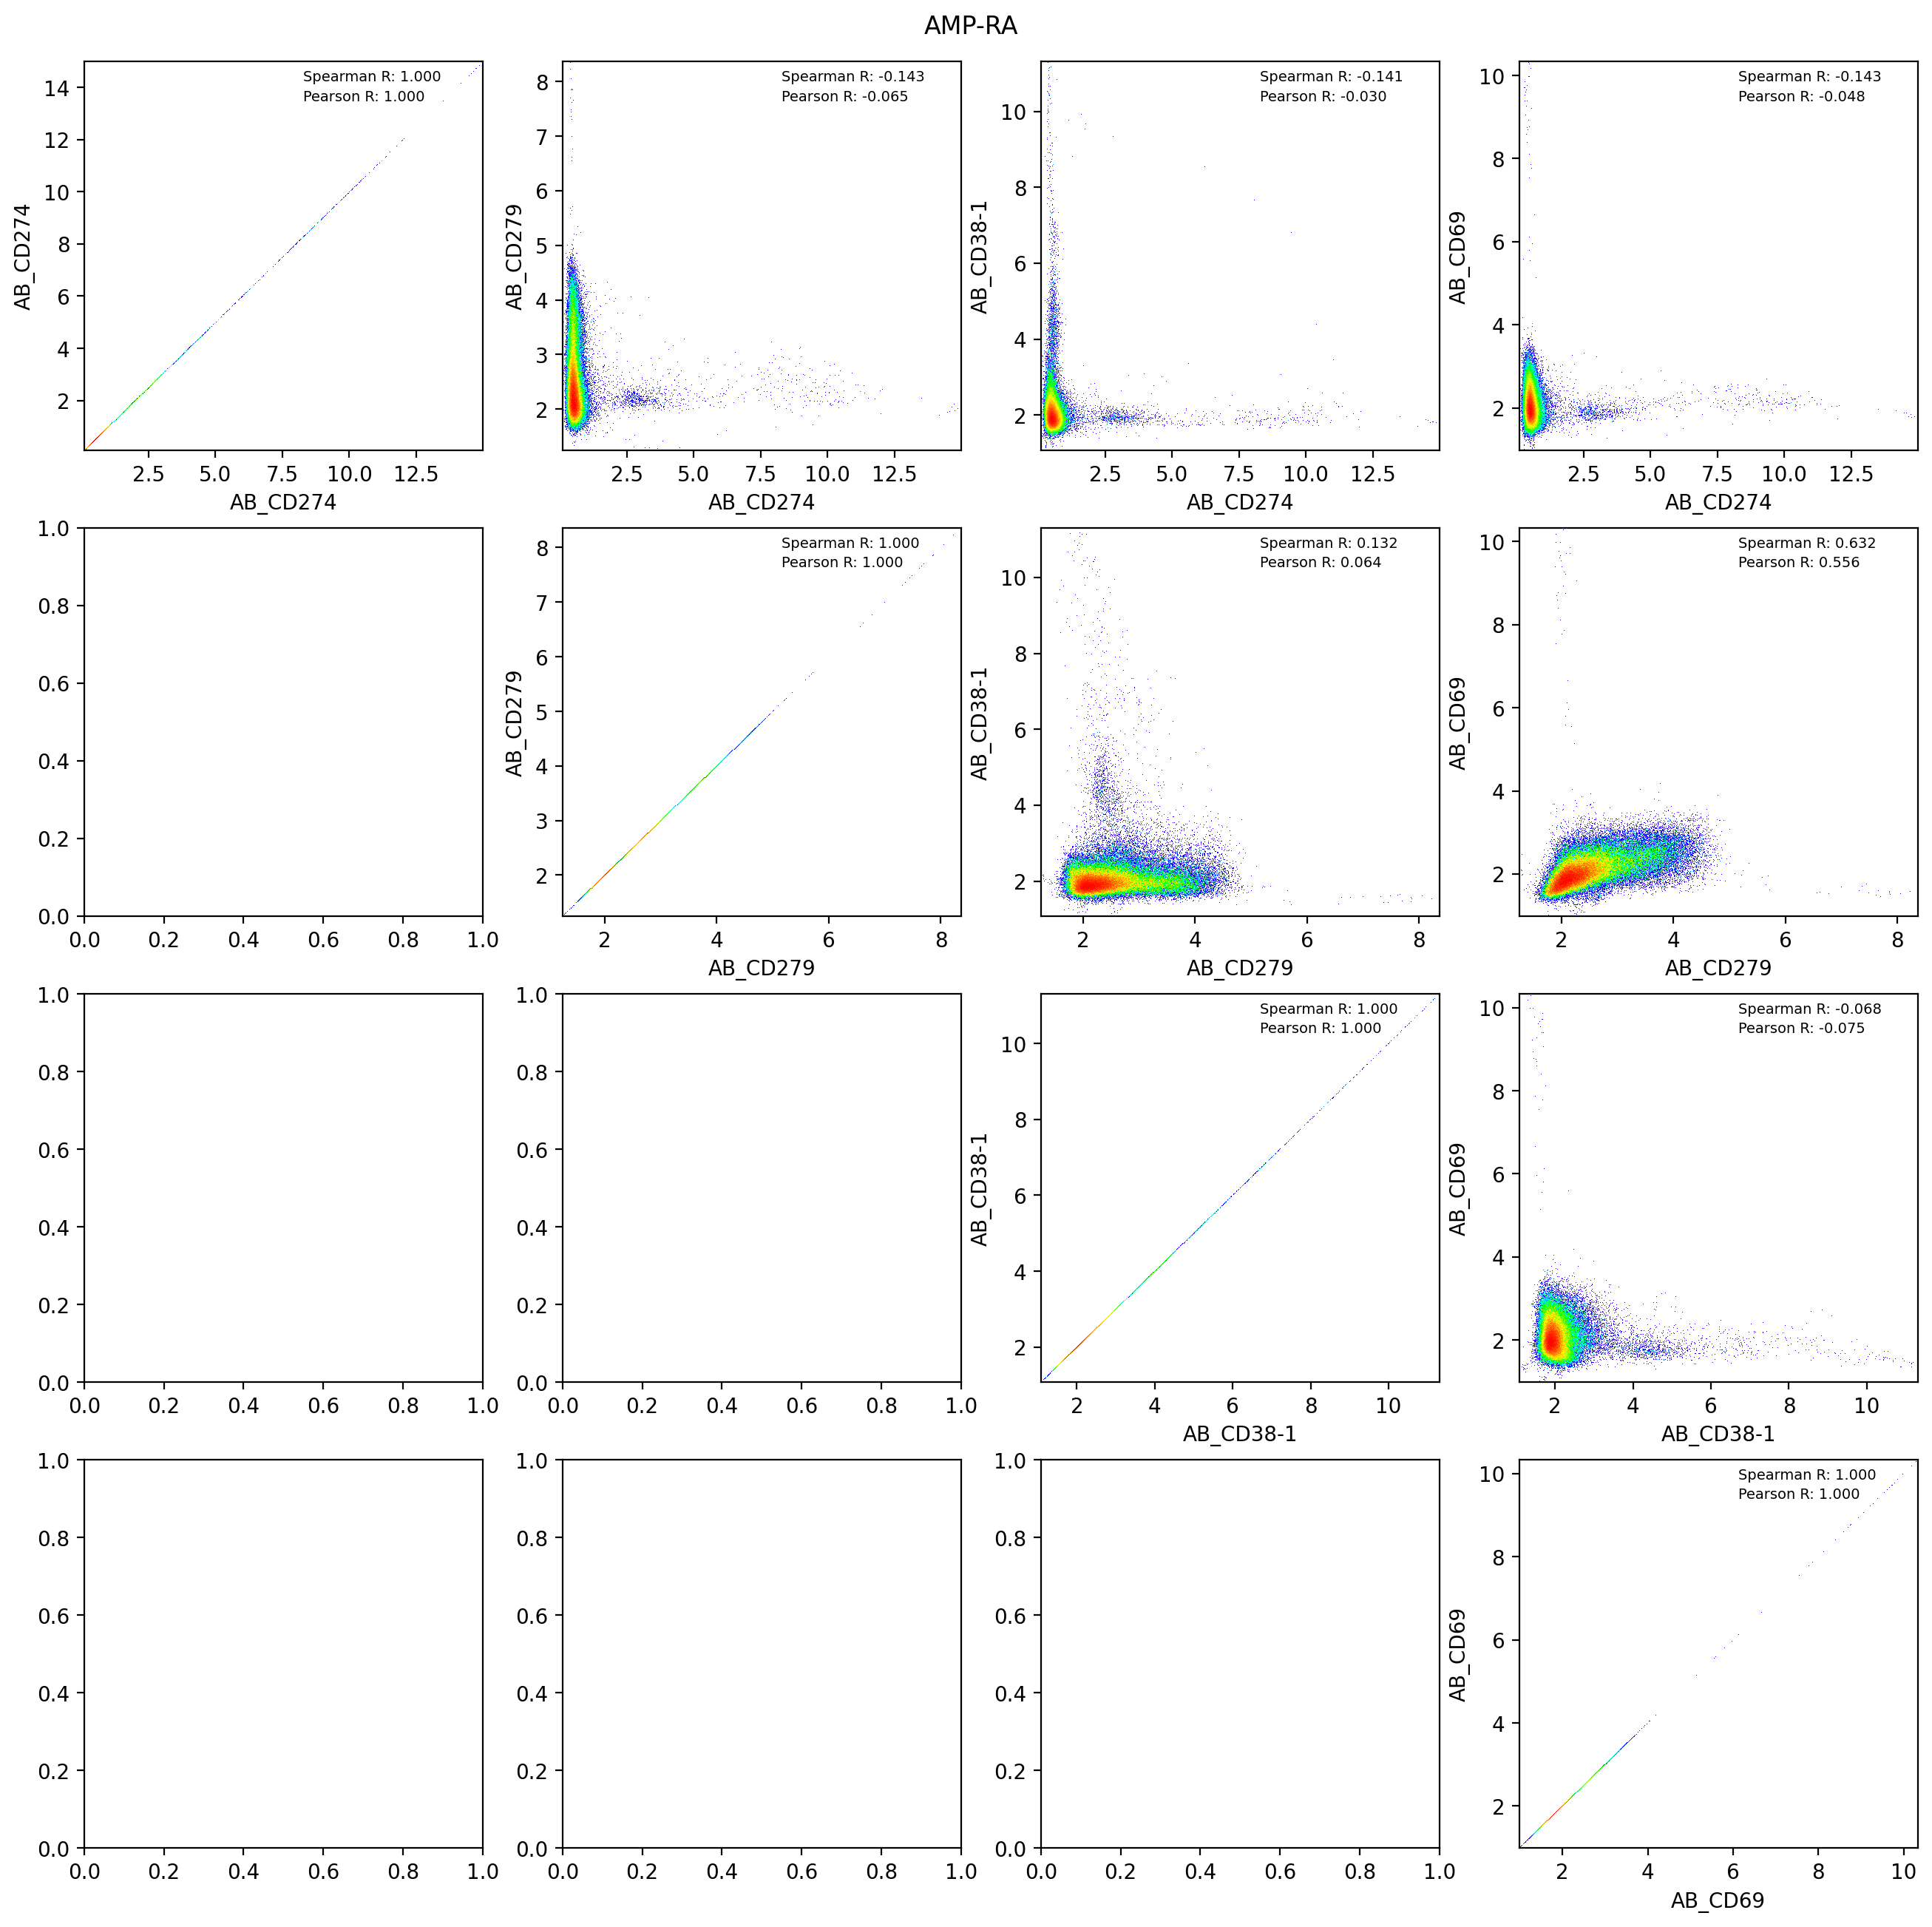

In [27]:
nrows = len(markers_magic.columns)
ncols = len(markers_magic.columns)
fig, axes = plt.subplots(dpi = 200, figsize = (4*len(markers_magic.columns), 4*len(markers_magic.columns)),
                                               nrows = nrows, ncols = ncols)

for i, p1 in enumerate(markers_magic.columns):
    print(i, p1)
    # i = i-1
    
    for j, p2 in enumerate(markers_magic.columns):
        # j = j-1
        if j >= i:
            print(j, p1)
            ax = axes[i, j]
            x = markers_magic[p1]
            y = markers_magic[p2]
            
            r_p, _ = pearsonr(x, y)
            r_s, _ = spearmanr(x, y)

            # ax.scatter(x, y)
            dsshow(pd.DataFrame({'x':x, 'y':y}), 
                   ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
            # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
            ax.text(x = .55, y = .95, s = 'Spearman R: %.3f' % r_s, fontsize = 7, transform=ax.transAxes)
            ax.text(x = .55, y = .9, s = 'Pearson R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
            ax.set_xlabel(p1)
            ax.set_ylabel(p2)
plt.suptitle(dataset,y = 0.9)

AB_CD274 AB_CD274
AB_CD274 AB_CD279
AB_CD274 AB_CD38-1
AB_CD274 AB_CD69
AB_CD279 AB_CD274
AB_CD279 AB_CD279
AB_CD279 AB_CD38-1
AB_CD279 AB_CD69
AB_CD38-1 AB_CD274
AB_CD38-1 AB_CD279
AB_CD38-1 AB_CD38-1
AB_CD38-1 AB_CD69
AB_CD69 AB_CD274
AB_CD69 AB_CD279
AB_CD69 AB_CD38-1
AB_CD69 AB_CD69


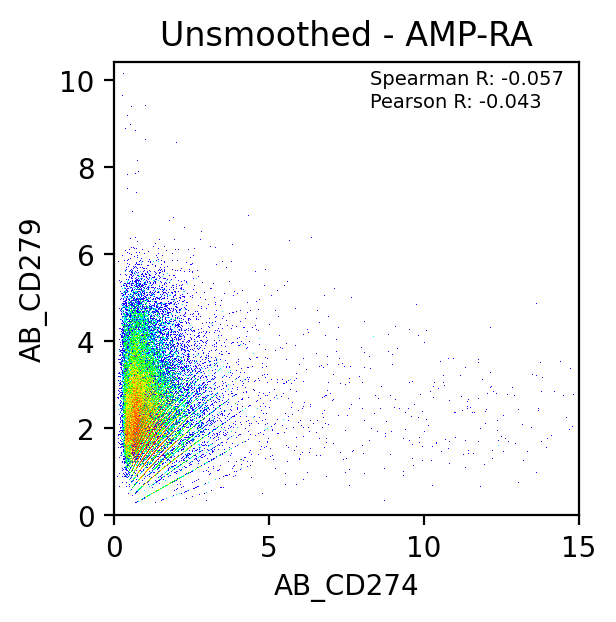

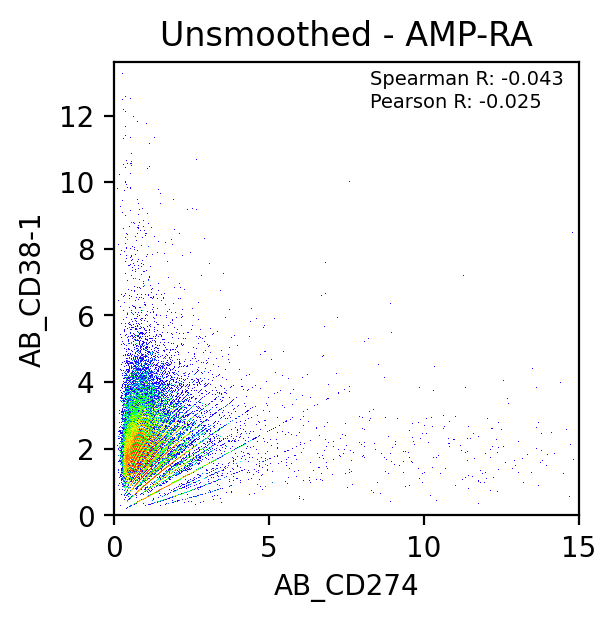

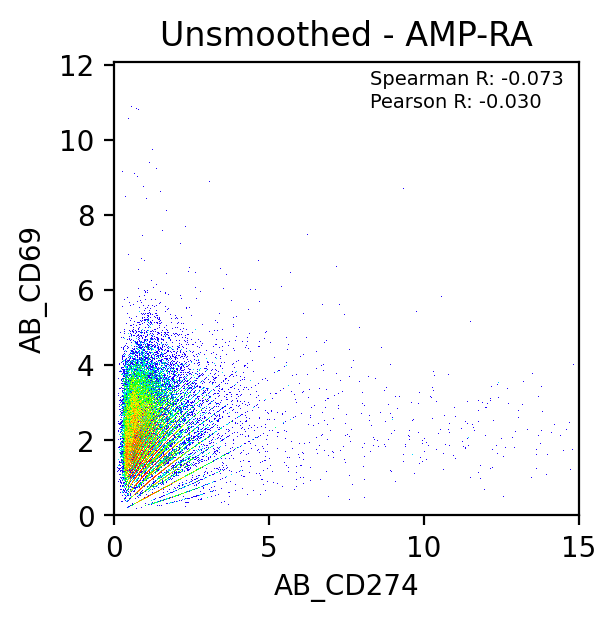

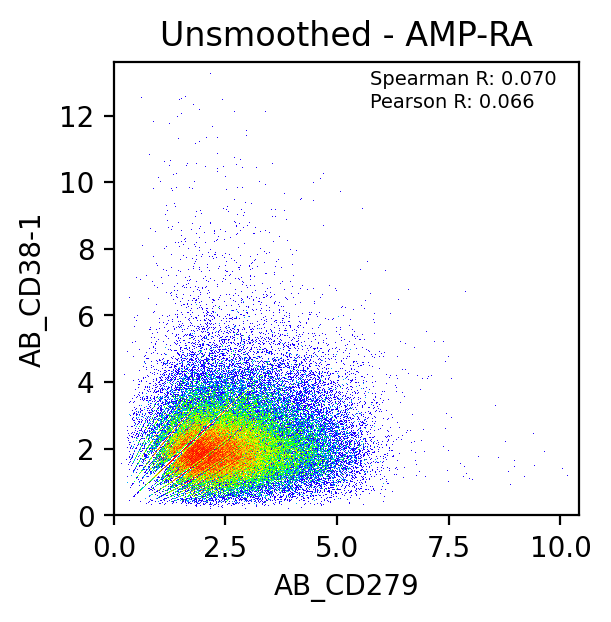

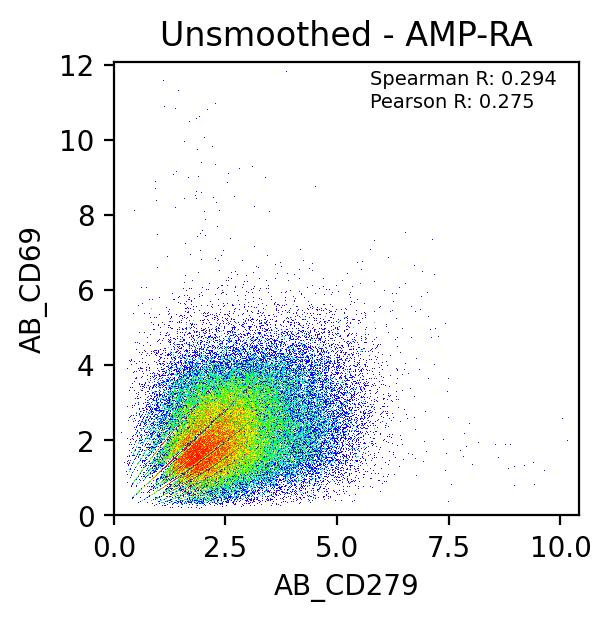

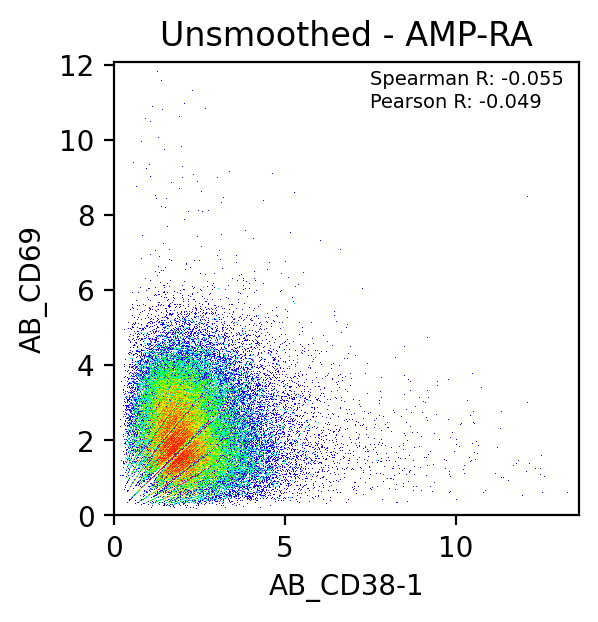

In [28]:
for i, p1 in enumerate(markers_magic.columns):
    
    for j, p2 in enumerate(markers_magic.columns):
        print(p1, p2)
        if j > i:
            x = unsmoothed_markers[p1]
            y = unsmoothed_markers[p2]
            
            r_p, _ = pearsonr(x, y)
            r_s, _ = spearmanr(x, y)

            fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
            # ax.scatter(x, y)
            dsshow(pd.DataFrame({'x':x, 'y':y}), 
                   ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
            # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
            ax.text(x = .55, y = .95, s = 'Spearman R: %.3f' % r_s, fontsize = 7, transform=ax.transAxes)
            ax.text(x = .55, y = .9, s = 'Pearson R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
            ax.set_xlabel(p1)
            ax.set_ylabel(p2)
            ax.set_title('Unsmoothed - %s' % dataset)

Text(0.5, 0.9, 'AMP-RA')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


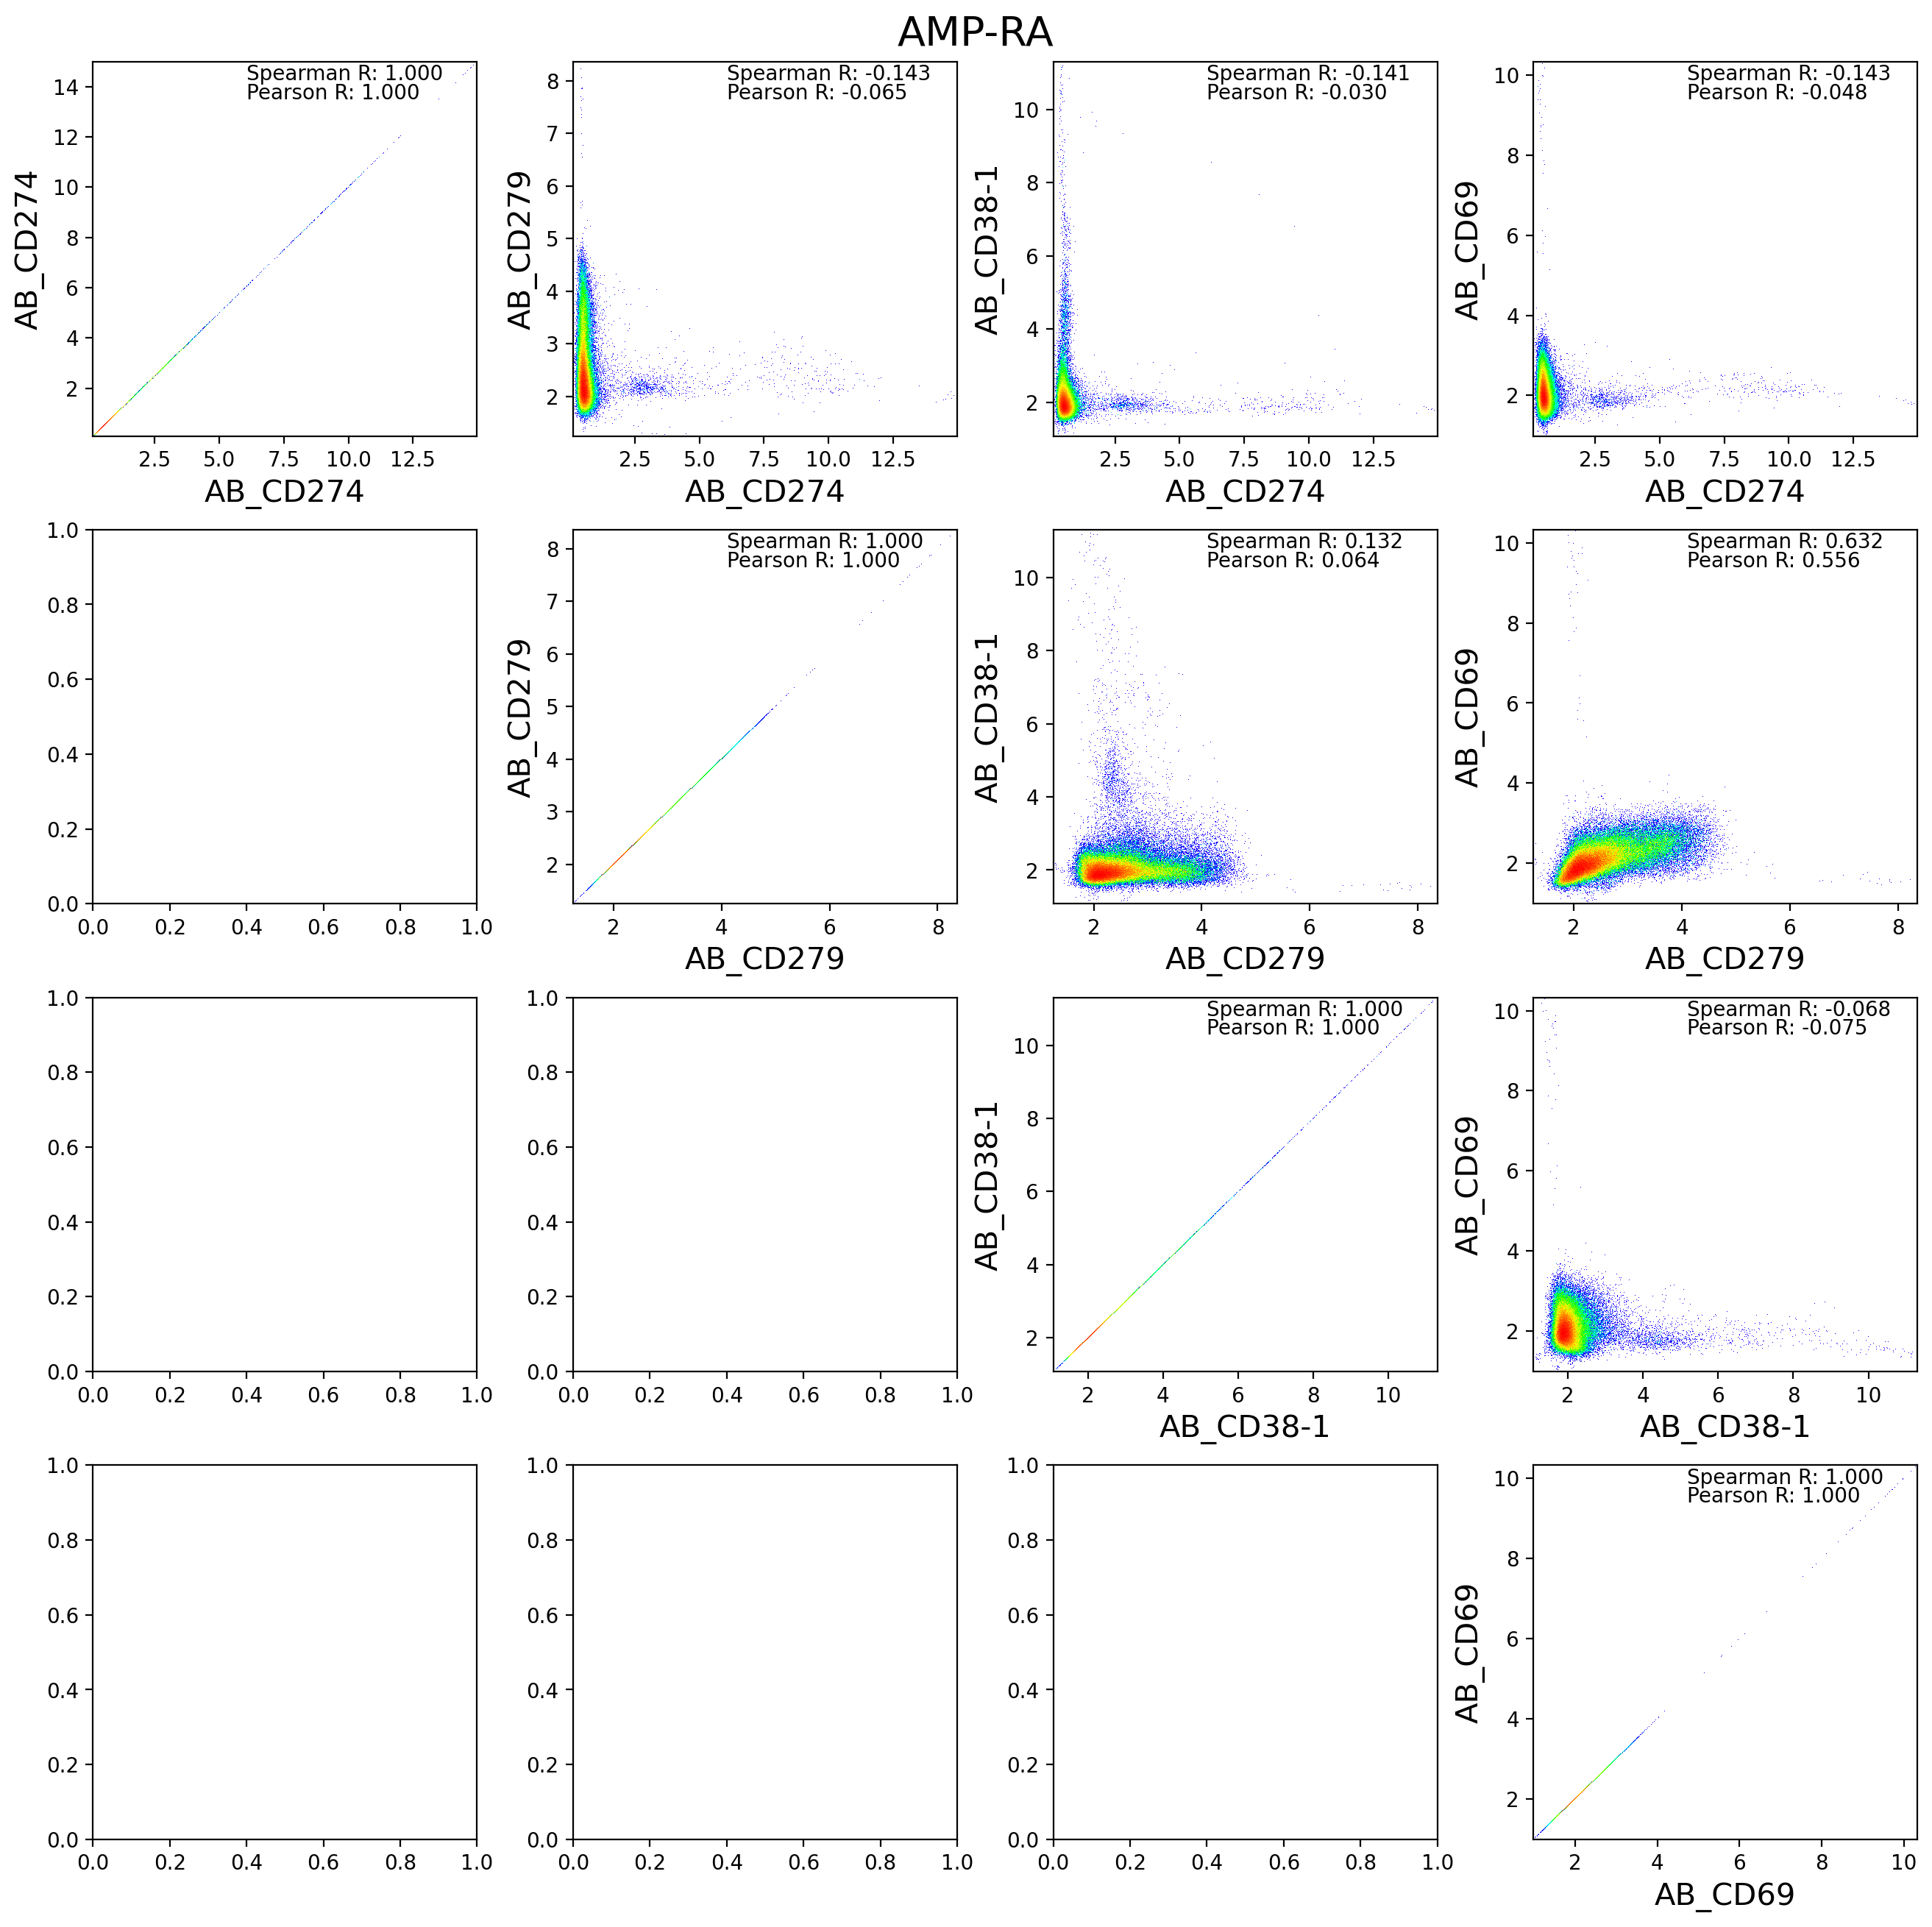

In [30]:
fontsize = 15
nrows = len(markers_magic.columns)
ncols = len(markers_magic.columns)
fig, axes = plt.subplots(dpi = 200, figsize = (4*len(markers_magic.columns), 4*len(markers_magic.columns)),
                                               nrows = nrows, ncols = ncols, 
                        gridspec_kw = {'wspace' : 0.25, 'hspace' : 0.25})

ind = markers_magic.index #lineage_gating[lineage_gating['class']==lineage].index
for i, p1 in enumerate(markers_magic.columns):
    # print(i, p1)
    # i = i-1

    for j, p2 in enumerate(markers_magic.columns):
        # j = j-1
        if j >= i:
            # print(j, p1)
            ax = axes[i, j]
            x = markers_magic.loc[ind, p1]
            y = markers_magic.loc[ind, p2]

            r_p, _ = pearsonr(x, y)
            r_s, _ = spearmanr(x, y)

            # ax.scatter(x, y)
            dsshow(pd.DataFrame({'x':x, 'y':y}), 
                   ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
            # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
            ax.text(x = .4, y = .95, s = 'Spearman R: %.3f' % r_s, fontsize = 10, transform=ax.transAxes)
            ax.text(x = .4, y = .9, s = 'Pearson R: %.3f' % r_p, fontsize = 10, transform=ax.transAxes)
            ax.set_xlabel(p1, fontsize = fontsize)
            ax.set_ylabel(p2, fontsize = fontsize)
plt.suptitle('%s' % (dataset), y = 0.9, fontsize = fontsize + 5)

In [31]:
# cmap = plt.cm.hsv
# cmaplist = [cmap(i) for i in range(cmap.N)]
# cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
# cmaplist.reverse()
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)
    
def gate(data, g1, g2, ind=None, vertical_gate=None, horizontal_gate=None, quadrant_gate=None,
         labfontsize=9, plot_labeled=False, upper_only=False, ax=None):
    
    
    if ax is None:
        fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
        gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
        ax = fig.add_subplot(gs[0])

    if ind  is None:
        ind = pd.Series(np.array([True]*data.shape[0]), data.index)
    
    
    x = data.loc[ind, g1]
    y = data.loc[ind, g2]
    
    dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    ax.set_xlabel(g1, fontsize=labfontsize)
    ax.set_ylabel(g2, fontsize=labfontsize)

    
    if vertical_gate is not None:
        xlim = ax.get_xlim()
        ax.hlines(y=vertical_gate['vthresh'], xmin=xlim[0], xmax=xlim[1], linestyle='--', color='k', linewidth=1)
        ax.set_xlim(xlim)
        
            
        initial_res = (data.loc[ind, g2]>vertical_gate['vthresh']).replace({True:vertical_gate['above_name'], False:vertical_gate['below_name']})
        final_res = ind.copy()
        final_res.loc[ind] = initial_res
        final_res.loc[~ind] = np.nan
    elif horizontal_gate is not None:
        ylim = ax.get_ylim()
        ax.vlines(x=horizontal_gate['hthresh'], ymin=ylim[0], ymax=ylim[1], linestyle='--', color='k', linewidth=1)
        ax.set_ylim(ylim)
        
        initial_res = (data.loc[ind, g1]>horizontal_gate['hthresh']).replace({False:horizontal_gate['left_name'], True:horizontal_gate['right_name']})
        final_res = ind.copy()
        final_res.loc[ind] = initial_res
        final_res.loc[~ind] = np.nan
        
        
    elif quadrant_gate is not None:
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        if not upper_only:
            ax.hlines(y=quadrant_gate['vthresh'], xmin=xlim[0]-1, xmax=xlim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_xlim(xlim)
            ax.vlines(x=quadrant_gate['hthresh'], ymin=ylim[0]-1, ymax=ylim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_ylim(ylim)
        else:
            ax.hlines(y=quadrant_gate['vthresh'], xmin=quadrant_gate['hthresh'], xmax=xlim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_xlim(xlim)
            ax.vlines(x=quadrant_gate['hthresh'], ymin=quadrant_gate['vthresh'], ymax=ylim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_ylim(ylim)            
            

        indh = data.loc[ind, g1]> quadrant_gate['hthresh']
        indv = data.loc[ind, g2]> quadrant_gate['vthresh']
        final_res = ind.replace(False,np.nan)
        for hval,vval, lab in [[False, False, quadrant_gate['ll']], [True, False, quadrant_gate['lr']], [False, True, quadrant_gate['ul']], [True, True, quadrant_gate['ur']]]:
            tolab = (indh==hval) & (indv==vval)
            final_res.loc[tolab.index[tolab]] = lab
            
            
    if plot_labeled:
        fig = plt.figure(constrained_layout=True, figsize=(2.4, 2.), dpi=200)
        gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.8, top=.92)
        ax2 = fig.add_subplot(gs[0])
        dat = pd.concat([x,y,final_res], axis=1)
        dat.columns = [g1, g2, 'label']
        for (k,g) in dat.groupby('label'):
            ax2.scatter(g[g1], g[g2], label=k, s=.5, edgecolor='None')
        ax2.legend(bbox_to_anchor=(1,1), markerscale=3, fontsize=6)
        
        
        
    return(final_res, ax)

In [32]:
gating = pd.DataFrame(index=markers_magic.index, columns=['Activated'])


In [ ]:
p1 = 'AB_CD38-1'
p2 = 'AB_CD279'

In [ ]:
gating

In [ ]:
gating['gdT'], ax = gate(markers_magic, g1, g2, ind=None, vertical_gate=vgate, plot_labeled=False)


In [ ]:
# g1 = 'AB_CD279'
# g2 = 'AB_CD71'   
# gating['Activated'], ax = gate(markers_magic, g1, g2, ind=None,
#                       quadrant_gate={'vthresh':1.8, 'hthresh':2.5, 'ur':'MAIT', 'ul':'ab', 'll':'ab', 'lr':'ab'}, plot_labeled=False, upper_only=True)
# ax.text(3.3,6.5, 'Activated', fontsize=9)
# # plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_gdT.png'))
# # plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_gdT.pdf'))

Text(3, 6.5, 'Activated')

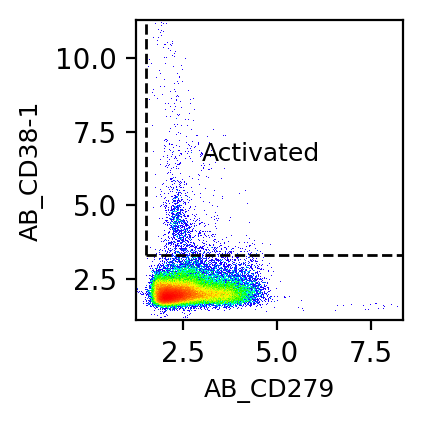

In [41]:
g1 = 'AB_CD279'
g2 = 'AB_CD38-1'
gating['Activated'], ax = gate(markers_magic, g1, g2, ind=None,
                      quadrant_gate={'vthresh':3.3, 'hthresh':1.5, 'ur':'Activated', 'ul':'Unactivated', 'll':'Unactivated', 'lr':'Unactivated'}, 
                               plot_labeled=False, upper_only=True)
ax.text(3,6.5, 'Activated', fontsize=9)
# plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_gdT.png'))
# plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_gdT.pdf'))

In [42]:
gating['Activated']

BRI-399_AAACGAATCTGCATGA     Unactivated
BRI-399_AAACGCTTCCTTGACC     Unactivated
BRI-399_AAAGGGCAGCCGGAAT     Unactivated
BRI-399_AAAGGGCCACTATGTG     Unactivated
BRI-399_AAAGGTAGTGCAGGAT     Unactivated
                                ...     
BRI-637R_TGGTACAGTTACCCAA    Unactivated
BRI-637R_TGTCAGACAACGGCTC    Unactivated
BRI-637R_TTCCAATAGGTACCTT    Unactivated
BRI-637R_TTCGGTCCAGCAGTAG    Unactivated
BRI-637R_TTTGTTGTCTAGTGAC    Unactivated
Name: Activated, Length: 94048, dtype: object

In [43]:
outfn = os.path.join(outdir, 'ManualGatingActivation.Magic.20230111.tsv')
print(outfn)

../../../Data/PerDataset/AMPRA/ManualGatingActivation.Magic.20230111.tsv


In [44]:
gating.to_csv(outfn, sep='\t')

## By lineage classes

In [ ]:
lineage_gating = pd.read_csv(params.loc[dataset, 'manual_gating_fn'], index_col = 0, sep = '\t')
lineage_gating.columns = ['gating']

lineage_gating['class'] = np.nan
lineage_gating.loc[lineage_gating['gating'].str.contains('CD4'), 'class'] = 'CD4'
lineage_gating.loc[lineage_gating['gating']=='Treg', 'class'] = 'CD4'
lineage_gating.loc[lineage_gating['gating'].str.contains('CD8'), 'class'] = 'CD8'
lineage_gating.loc[lineage_gating['class'].isna(), 'class'] = 'Other'

In [ ]:
lineage_gating.value_counts()

In [ ]:
lineage_gating['class'].value_counts()

In [ ]:
len(ind)

In [ ]:
for lineage in lineage_gating['class'].unique():
    print(lineage)
    fontsize = 15
    nrows = len(markers_magic.columns)
    ncols = len(markers_magic.columns)
    fig, axes = plt.subplots(dpi = 200, figsize = (4*len(markers_magic.columns), 4*len(markers_magic.columns)),
                                                   nrows = nrows, ncols = ncols, 
                            gridspec_kw = {'wspace' : 0.25, 'hspace' : 0.25})
    
    ind = lineage_gating[lineage_gating['class']==lineage].index
    for i, p1 in enumerate(markers_magic.columns):
        # print(i, p1)
        # i = i-1

        for j, p2 in enumerate(markers_magic.columns):
            # j = j-1
            if j >= i:
                # print(j, p1)
                ax = axes[i, j]
                x = markers_magic.loc[ind, p1]
                y = markers_magic.loc[ind, p2]

                r_p, _ = pearsonr(x, y)
                r_s, _ = spearmanr(x, y)

                # ax.scatter(x, y)
                dsshow(pd.DataFrame({'x':x, 'y':y}), 
                       ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
                # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
                ax.text(x = .4, y = .95, s = 'Spearman R: %.3f' % r_s, fontsize = 10, transform=ax.transAxes)
                ax.text(x = .4, y = .9, s = 'Pearson R: %.3f' % r_p, fontsize = 10, transform=ax.transAxes)
                ax.set_xlabel(p1, fontsize = fontsize)
                ax.set_ylabel(p2, fontsize = fontsize)
    plt.suptitle('%s - %s' % (dataset, lineage), y = 0.9, fontsize = fontsize + 10)

In [ ]:
gating = pd.DataFrame(index=markers_magic.index, columns=['Activated_CD8', 'Activated_CD4', 
                                                          'Activated_Other', 'Class'])
gating['Class'] = lineage_gating.loc[gating.index, 'class']

In [ ]:
lineage = 'CD8'
ind = lineage_gating.loc[markers_magic.index, 'class']==lineage

In [ ]:
gating['Activated_CD8'].value_counts()

In [ ]:
g1 = 'AB_CD95'
g2 = 'AB_CD71'   
gating['Activated_CD8'], ax = gate(markers_magic, g1, g2, ind= ind,
                      quadrant_gate={'vthresh':1.5, 'hthresh':2.75, 'ur':'Activated', 'ul':'Unactivated', 'll':'Unactivated', 'lr':'Unactivated'}, 
                               plot_labeled=False, upper_only=True)
ax.text(3.2,6, 'Activated', fontsize=8)
ax.set_title(lineage, fontsize=10)
plt.savefig(os.path.join(figdir, 'ManualGatingActivation_COMBAT_CD8.png'))
plt.savefig(os.path.join(figdir, 'ManualGatingActivation_COMBAT_CD8.pdf'))

In [ ]:
lineage = 'CD4'
ind = lineage_gating.loc[markers_magic.index, 'class']==lineage

In [ ]:
gating['Activated_CD4'].value_counts()

In [ ]:
g1 = 'AB_CD95'
g2 = 'AB_CD71'   
gating['Activated_CD4'], ax = gate(markers_magic, g1, g2, ind= ind,
                      quadrant_gate={'vthresh':2, 'hthresh':3, 'ur':'Activated', 'ul':'Unactivated', 'll':'Unactivated', 'lr':'Unactivated'}, 
                               plot_labeled=False, upper_only=True)
ax.text(3.6,6.2, 'Activated', fontsize=8)
ax.set_title(lineage, fontsize=10)
plt.savefig(os.path.join(figdir, 'ManualGatingActivation_COMBAT_CD4.png'))
plt.savefig(os.path.join(figdir, 'ManualGatingActivation_COMBAT_CD4.pdf'))

In [ ]:
lineage = 'Other'
ind = lineage_gating.loc[markers_magic.index, 'class']==lineage

In [ ]:
gating['Activated_Other'].value_counts()

In [ ]:
g1 = 'AB_CD95'
g2 = 'AB_CD71'   
gating['Activated_Other'], ax = gate(markers_magic, g1, g2, ind= ind,
                      quadrant_gate={'vthresh':1.6, 'hthresh':3, 'ur':'Activated', 'ul':'Unactivated', 'll':'Unactivated', 'lr':'Unactivated'}, 
                               plot_labeled=False, upper_only=True)
ax.text(3.5,5.65, 'Activated', fontsize=8)
ax.set_title(lineage, fontsize=10)
plt.savefig(os.path.join(figdir, 'ManualGatingActivation_COMBAT_Other.png'))
plt.savefig(os.path.join(figdir, 'ManualGatingActivation_COMBAT_Other.pdf'))

In [ ]:
gating['Activated_Other'].value_counts()

In [ ]:
gating['Activated'] = np.nan

In [ ]:
label = gating[['Activated_CD8', 'Activated_CD4', 'Activated_Other']].unstack().dropna().reset_index()
label.index = label['level_1']

In [ ]:
gating.loc[label.index, 'Activated'] = label[0]

In [ ]:
label.shape

In [ ]:
len(label.index.unique())

In [ ]:
label.head()

In [ ]:
(gating.isna().sum(axis = 1)==2).value_counts()

In [ ]:
gating

In [ ]:
gating['Activated'].value_counts()

In [ ]:
gating[['Class', 'Activated']].value_counts()

In [ ]:
outfn = os.path.join(outdir, 'ManualGatingActivationByLineage.Magic.20230112.tsv')
print(outfn)

In [ ]:
gating[['Class', 'Activated']].to_csv(outfn, sep='\t')

# Compare proteins with TCAT usages

In [ ]:
aim_assoc_geps = ['Early-Activation',
'ISG',
'BCL2-Survival',
'Treg',
'OX40/EBI3-Activation',
'Cytoskeleton',
'Th17',
'ICOS/CD38-Activation',
'Exhaustion',
'RGCC/MYADM',
'CCR10-Migration',
'CellCycle-S',
'Tfh-2',
'CTLA4+/CD38+-Activation',
'HeatShock',
'Tph',
'Multi-Cytokine',
'TIMD4/TIM3-Activation',
'Th17-2',
'Th2-2',
'Metallothionein',
'CellCycle-Late-S',
'CellCycle-G2M',
                   ]

In [ ]:
cc_assoc_geps = ['CTLA4+/CD38+-Activation', 'Cytoskeleton', 'Early-Activation',
       'Exhaustion', 'HLA', 'ICOS/CD38-Activation', 'IL10/IL19-Secretion',
       'Metallothionein', 'OX40/EBI3-Activation', 'TIMD4/TIM3-Activation',
       'Th17-2', 'Tph']

In [ ]:
gep_info = read_dataset_log('cGEP_Name')
rename_map = dict(zip(gep_info['cGep_Name'], gep_info['Short_Name']))


In [ ]:
dataset = 'COMBAT'

In [ ]:
usage = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t')

In [ ]:
usage.columns = usage.columns.map(rename_map)
usage_norm = usage.div(usage.sum(axis=1), axis=0)


In [ ]:
usage_norm

In [ ]:
activation_geps = sorted(list(set(aim_assoc_geps).intersection(cc_assoc_geps)))
activation_geps

In [ ]:
overlap = (markers_magic.index).intersection(usage_norm.index)
len(overlap)

In [ ]:
nrows = len(activation_geps)
ncols = len(markers_magic.columns)
fig, axes = plt.subplots(dpi = 200, figsize = (4*len(markers_magic.columns), 4*len(activation_geps),),
                                               nrows = nrows, ncols = ncols)

for i, gep in enumerate(activation_geps):
    print(i, gep)
    # i = i-1
    
    for j, p2 in enumerate(markers_magic.columns):
        # if j >= i:
        ax = axes[i, j]
        x = markers_magic.loc[overlap, p2]
        y = usage_norm.loc[overlap, gep]

        r_p, _ = pearsonr(x, y)
        r_s, _ = spearmanr(x, y)

        # ax.scatter(x, y)
        dsshow(pd.DataFrame({'x':x, 'y':y}), 
               ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
        # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
        ax.text(x = .55, y = .95, s = 'Spearman R: %.3f' % r_s, fontsize = 7, transform=ax.transAxes)
        ax.text(x = .55, y = .9, s = 'Pearson R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
        ax.set_xlabel(p2)
        ax.set_ylabel(gep)
plt.suptitle(dataset,y = 0.9)